In [ ]:
import pandas as pd
wine_data = pd.read_csv('./wine.csv')
display(wine_data)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [ ]:
x = wine_data[["residual sugar", "density", "citric acid"]]
y = wine_data["alcohol"]

In [ ]:
x

,residual sugar,density,citric acid
0,1.9,0.99780,0.00
1,2.6,0.99680,0.00
2,2.3,0.99700,0.04
3,1.9,0.99800,0.56
4,1.9,0.99780,0.00
...,...,...,...
6492,1.6,0.99114,0.29
6493,8.0,0.99490,0.36
6494,1.2,0.99254,0.19
6495,1.1,0.98869,0.30


In [ ]:
y

,alcohol
0,9.4
1,9.8
2,9.8
3,9.8
4,9.4
...,...
6492,11.2
6493,9.6
6494,9.4
6495,12.8


In [ ]:
from sklearn.model_selection import train_test_split #훈련, 학습 데이터 구분하기

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=1)

print(len(x_train))
print(len(x_valid))
print(len(y_train))
print(len(y_valid))

5197
1300
5197
1300


In [ ]:
x_train

,residual sugar,density,citric acid
4152,1.10,0.99066,0.42
931,2.00,0.99748,0.01
4252,11.00,0.99786,0.27
1743,2.00,0.99210,0.40
1238,2.50,0.99798,0.00
...,...,...,...
905,3.00,0.99800,0.20
5192,4.20,0.99200,0.28
3980,5.10,0.99518,0.42
235,1.90,0.99675,0.00


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler #데이터 전처리(preprocessing)중 scaling 과정
#scaling : 데이터의 크기나 단위를 맞춰주는 과정

ss = StandardScaler()
x_tain = ss.fit_transform(x_train) #훈련 데이터의 평균, 표편을 학습(fit)하고, 그걸 변환(transform) 수행
x_valid = ss.transform(x_valid) #검증 데이터에는 훈련 데이터에서 구한 기준값을 그대로 적용

#StandardScaler = 평균0, 표편1(정규분포형 데이터 적합) -> 평균보다 얼마나 위/아래야
#MinMaxScaler = 0~1범위 (딥러닝에서 자주 사용) -> 제일 작은 값 0, 제일 큰 값 1, 그 사이 비례 조
#RobustScaler = 이상치에 강함(영향 안받음) -> (10,12,14,100) 100이 이상치 / 중간값과 IQR이 기준

#ms = MinMaxScaler()
#x_train = ms.fit_transform(x_train)
#x_valid = ms.transform(x_valid)

#rs = RobustScaler()
#x_train = rs.fit_transform(x_train)
#x_valid = rs.transform(x_valid)

In [ ]:
x_train

,residual sugar,density,citric acid
4152,1.10,0.99066,0.42
931,2.00,0.99748,0.01
4252,11.00,0.99786,0.27
1743,2.00,0.99210,0.40
1238,2.50,0.99798,0.00
...,...,...,...
905,3.00,0.99800,0.20
5192,4.20,0.99200,0.28
3980,5.10,0.99518,0.42
235,1.90,0.99675,0.00


In [ ]:
y_train

,alcohol
4152,11.2
931,9.8
4252,8.7
1743,11.2
1238,9.6
...,...
905,9.5
5192,10.7
3980,10.2
235,9.0


In [ ]:
import pandas as pd
wine_data_2 = pd.read_csv('./wine.csv')
display(wine_data_2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [ ]:
x = wine_data_2[["volatile acidity", "residual sugar", "free sulfur dioxide","density"]]
y = wine_data_2["alcohol"]

In [ ]:
x

,free sulfur dioxide,density
0,11.0,0.99780
1,25.0,0.99680
2,15.0,0.99700
3,17.0,0.99800
4,11.0,0.99780
...,...,...
6492,24.0,0.99114
6493,57.0,0.99490
6494,30.0,0.99254
6495,20.0,0.98869


In [ ]:
y

,alcohol
0,9.4
1,9.8
2,9.8
3,9.8
4,9.4
...,...
6492,11.2
6493,9.6
6494,9.4
6495,12.8


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state=55)

print(len(X_train))
print(len(X_valid))
print(len(y_train))
print(len(y_valid))

5197
1300
5197
1300


In [ ]:
X_train

,volatile acidity,residual sugar,free sulfur dioxide,density
5409,0.26,15.10,42.0,0.99705
1133,0.48,5.50,10.0,0.99684
486,0.67,1.90,6.0,0.99760
5247,0.31,6.65,30.0,0.99244
5104,0.20,3.00,26.0,0.99134
...,...,...,...,...
6077,0.32,7.90,53.0,0.99514
968,0.40,2.40,29.0,0.99430
4391,0.26,8.20,52.0,0.99584
4762,0.36,4.80,39.0,0.99036


In [ ]:
y_train

,alcohol
5409,10.5
1133,11.2
486,10.0
5247,11.1
5104,11.2
...,...
6077,9.6
968,12.2
4391,9.4
4762,12.7


In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_valid = rs.transform(X_valid)

In [ ]:
X_train

array([[ 0.54166667,  0.46956522],
       [-0.79166667,  0.42391304],
       [-0.95833333,  0.58913043],
       ...,
       [ 0.95833333,  0.20652174],
       [ 0.41666667, -0.98478261],
       [-0.5       , -0.03913043]])

In [ ]:
y_train

,alcohol
5409,10.5
1133,11.2
486,10.0
5247,11.1
5104,11.2
...,...
6077,9.6
968,12.2
4391,9.4
4762,12.7


In [ ]:
from sklearn.linear_model import LinearRegression #선형회귀처리
model = LinearRegression()

model.fit(X_train, y_train) #스케일링된 데이터로 LinearRegreesion 학습

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #예측이 얼마나 잘 맞는지 평가하는 평가지표로 확인
#MAE = 절댓값, MSE = 제곱, RMSE = 루트 제곱, R2_SCORE = 객관적 지표(회귀에서 객관적인 성능을 측정하기 위해 사용)


prediction = model.predict(X_valid)
prediction

array([ 9.83454908, 10.94527249, 10.58007471, ..., 11.10542897,
       10.91309798, 10.65095628])

In [ ]:
y_valid

,alcohol
4083,9.00
1898,10.30
4188,9.70
3117,12.00
4656,12.70
...,...
833,9.90
482,9.40
3602,11.60
1500,9.60


In [ ]:
print("valid mean_absolute_error : ", mean_absolute_error(y_valid,prediction))
print("valid mean_squared_error : ", mean_squared_error(y_valid, prediction))
print("valid root_mean_squared_error : ", (mean_squared_error(y_valid,prediction))**(1/2))
print("valid r2_score: ", r2_score(y_valid, prediction))

valid mean_absolute_error :  0.6139489792838918
valid mean_squared_error :  0.6107827337407623
valid root_mean_squared_error :  0.7815259008764599
valid r2_score:  0.549254340730315


In [ ]:
#전력사용량 예측하기
import pandas as pd
train_data = pd.read_csv('./train.csv', encoding='cp949')
display(train_data)

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [ ]:
#데이터 준비
X = train_data.iloc[:,3:]
y = train_data["전력사용량(kWh)"]
print(X)

        기온(°C)  풍속(m/s)  습도(%)  강수량(mm)  일조(hr)  비전기냉방설비운영  태양광보유
0         17.6      2.5   92.0      0.8     0.0        0.0    0.0
1         17.7      2.9   91.0      0.3     0.0        0.0    0.0
2         17.5      3.2   91.0      0.0     0.0        0.0    0.0
3         17.1      3.2   91.0      0.0     0.0        0.0    0.0
4         17.0      3.3   92.0      0.0     0.0        0.0    0.0
...        ...      ...    ...      ...     ...        ...    ...
122395    27.8      2.3   68.0      0.0     0.7        1.0    1.0
122396    27.3      1.2   71.0      0.0     0.0        1.0    1.0
122397    27.3      1.8   71.0      0.0     0.0        1.0    1.0
122398    27.1      1.8   74.0      0.0     0.0        1.0    1.0
122399    27.1      2.6   75.0      0.0     0.0        1.0    1.0

[122400 rows x 7 columns]


In [ ]:
#훈력, 학습 과정
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#데이터 전처리(preprocessing) 중 scaling 과정
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_valid = ss.transform(X_valid)

In [ ]:
#선형회귀
from sklearn.linear_model import LinearRegression

model = LinearRegression()
#모델 훈련
model.fit(X_train, y_train)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#예측
prediction = model.predict(X_valid)

#평가지표
print("valid mean_absolute_error: ",mean_absolute_error(y_valid,prediction))
#MAE = 1300, 예측이 실제값과 평균 1300정도 차이남

print("valid mean_squared_error: ",mean_squared_error(y_valid,prediction))
#MSE = 4068222, 루트하면 637정도의 오차를 갖고 있음

print("valid root_mean_squared_error: ",(mean_squared_error(y_valid,prediction))**(1/2))
#RMSE = 2017, 실제 단위기준으로 +-2000정도의 오차 발생하는거

print("valid r2_score: ", r2_score(y_valid,prediction))
#R2 = 0.063, 6.3%만 설명함 (모델이 데이터를 거의 설명을 못함)

valid mean_absolute_error:  1300.1251068321121
valid mean_squared_error:  4068222.0700186286
valid root_mean_squared_error:  2016.9834084638942
valid r2_score:  0.06339396697200628


In [ ]:
#서울시 중구 미세먼지 데이터로 미세먼지 예측하기

import pandas as pd

#데이터 적재
train_data = pd.read_csv('./air_pollution_train.csv', encoding = "cp949")
display(train_data)
train_data = train_data.dropna(how="any")
#결측값 없애는 방법(dropna() = nan이 들어있는 행을 삭제하는 방법)
#즉, 데이터 중에 비어있는 값이 하나라도 있으면 그 행 전체를 없애자



,0,1,4,5,6,7,8,9
0,1,1,0.003,0.7,0.003,0.054,39.0,24.0
1,1,2,0.003,0.8,0.002,0.056,38.0,27.0
2,1,3,0.003,0.9,0.002,0.057,42.0,28.0
3,1,4,0.003,0.8,0.002,0.054,42.0,31.0
4,1,5,0.003,0.8,0.002,0.048,49.0,33.0
...,...,...,...,...,...,...,...,...
8755,365,20,0.003,0.4,0.014,0.023,25.0,18.0
8756,365,21,0.003,0.4,0.011,0.025,25.0,19.0
8757,365,22,0.002,0.4,0.016,0.019,25.0,20.0
8758,365,23,0.002,0.4,0.012,0.022,21.0,17.0


In [ ]:
#변수 선택법에 대한 방법
# 1. 상관관계
# 2. 분산팽창요인 VIF : 다중공선성, 피처들간에 강한 상관관계 있는지 파악하기
# 3. 상식적으로 상관이 있는가
# 4. 옵션, 통계분석

,0,1,4,5,6,7,8,9
0,1.000000,-0.000727,-0.303123,-0.142555,-0.204565,-0.143745,-0.321946,-0.222831
1,-0.000727,1.000000,0.077200,-0.093966,0.194435,0.034007,0.011711,-0.011730
4,-0.303123,0.077200,1.000000,0.506919,0.077742,0.457549,0.546368,0.521783
5,-0.142555,-0.093966,0.506919,1.000000,-0.361866,0.749354,0.629053,0.696099
6,-0.204565,0.194435,0.077742,-0.361866,1.000000,-0.512242,0.013108,-0.024990
7,-0.143745,0.034007,0.457549,0.749354,-0.512242,1.000000,0.433366,0.459609
8,-0.321946,0.011711,0.546368,0.629053,0.013108,0.433366,1.000000,0.901878
9,-0.222831,-0.011730,0.521783,0.696099,-0.024990,0.459609,0.901878,1.000000


,0,1,4,5,6,7,8,9
0,1.000000,-0.000727,-0.303123,-0.142555,-0.204565,-0.143745,-0.321946,-0.222831
1,-0.000727,1.000000,0.077200,-0.093966,0.194435,0.034007,0.011711,-0.011730
4,-0.303123,0.077200,1.000000,0.506919,0.077742,0.457549,0.546368,0.521783
5,-0.142555,-0.093966,0.506919,1.000000,-0.361866,0.749354,0.629053,0.696099
6,-0.204565,0.194435,0.077742,-0.361866,1.000000,-0.512242,0.013108,-0.024990
7,-0.143745,0.034007,0.457549,0.749354,-0.512242,1.000000,0.433366,0.459609
8,-0.321946,0.011711,0.546368,0.629053,0.013108,0.433366,1.000000,0.901878
9,-0.222831,-0.011730,0.521783,0.696099,-0.024990,0.459609,0.901878,1.000000


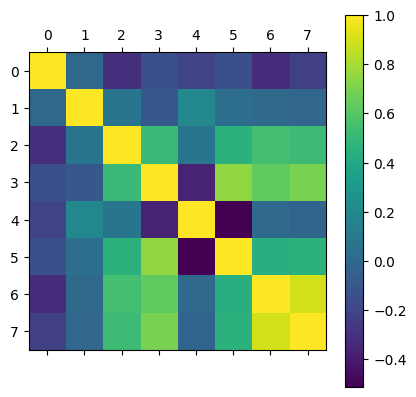

In [ ]:
# 1. 상관관계
import matplotlib.pyplot as plt #matplotlib 표준 인터페이스 plt로 불러오기
from matplotlib.pyplot import matshow #숫자 행렬 색으로 보여주는 함수 matshow

display(train_data.corr())

import matplotlib.pyplot as plt
from matplotlib.pyplot import matshow

display(train_data.corr()) #train_data 숫자 컬럼들기리 피어슨 상관계수를 계산해 표를 보여줌
# +1 : 정의 선형관계, 0 : 선형관계 거의 없음, -1 : 부의 선형관계

matshow(train_data.corr()) # 상관행렬을 색상 히트맵으로 시각화. 진한 색일수록 상관 큼
plt.colorbar()
plt.show()

#4,5,7,8 컬럼의 상관관계 절대값이 큼 = 서로 강하게 묶여있을 수 있어 (다중공선성 가능성)

In [ ]:
#다중공선성 검사 분산팽창요인 (VIF Factor > 10에서 15)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif

""


In [ ]:
#variance_inflation_factor() : 각 컬럼마다 다른 변수들과 얼마나 겹치는지 계산
# 즉, 이 변수는 다른 변수들과 얼마나 중복되어 있는가?를 수치로 표현하는 함수
# vif 값이 높을 수록 그 변수는 다른 변수들과 겹치는 정도가 크다 (즉, 불필요하게 비슷한 역할을 하는 변수일 가능성)
#vif 값
# 1~5 : 문제없음, 5~10 : 약간의 다중공선성 있음, 10이상 : 제거 또는 조정 필요


vif["VIF Factor"] = [variance_inflation_factor(train_data.values, i) for i in range(train_data.shape[1])]
vif["features"] = train_data.columns

#VIF값이 높은 순으로 정
vif = vif.sort_values(by="VIF Factor", ascending = False)
vif = vif.reset_index().drop(columns = 'index')

vif

#5,6,7,9,4 가 다중공선성 강함

#그 외, 3. 상식적으로 따지기 / 논문 OR 뉴스기사, 사전에 연구했던 사례 들 보고 변수 선택


,VIF Factor,features
0,22.296365,5
1,17.576023,8
2,15.964373,7
3,15.786066,9
4,15.096030,4
5,4.562190,1
6,3.724255,6
7,3.009820,0


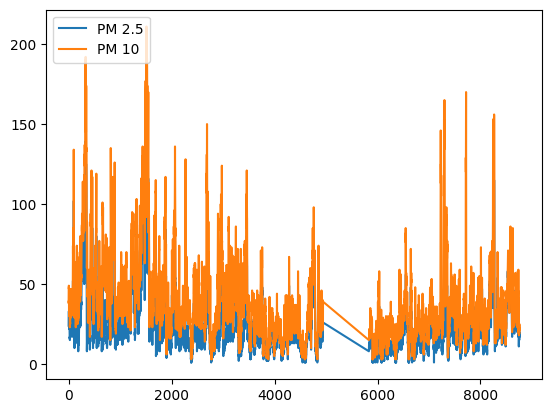

In [ ]:
#365일, 24시간 흐름대로 쭉 직선 그리고 싶을 때

plt.plot(train_data.iloc[:,-1], label = "PM 2.5")
plt.plot(train_data.iloc[:,-2], label = "PM 10")
plt.legend(loc = "upper left")
plt.show()

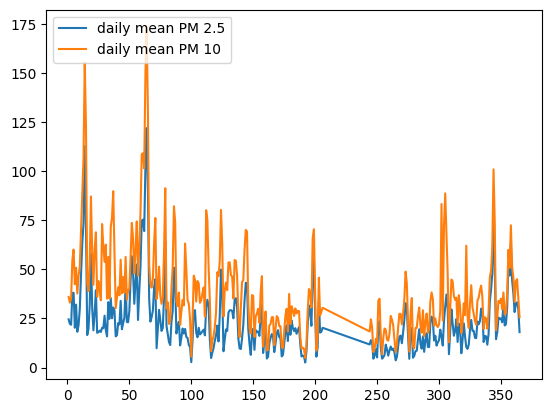

In [ ]:
#365일 일자별 평균값으로 그리고 싶을때

data365 = train_data.groupby(by="0").mean()
plt.plot(data365.iloc[:,-1], label = "daily mean PM 2.5")
plt.plot(data365.iloc[:,-2], label = "daily mean PM 10")
plt.legend(loc="upper left")
plt.show()

In [ ]:
#데이터 준비 4,5,7,8

X = train_data[['4', '5','7','8']]
y = train_data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

xt, xv, yt, yv = train_test_split(X, y, test_size = 0.2)

#스케일러를 적용해야하는데 분포가 많이 치우쳐진 데이터가 있는지 확인
train_data.describe()

# MEAN 값이랑 50% 값 비교
# 8번MEAN = 39 50% = 32, 평균이 중앙값보다 크기 떄문에 오른쪽으로 긴 꼬리를 가진 분표형태 (ROBUSTSCALER 가 더 적합)

# StandardScaler 평균 0, 표준편차 1로 맞춤 = 값들이 정규분포 비슷할때 사용
# MinMaxSvaler 0~1 사이로 맞춤, 값의 범위가 일정해야 할 때 사용
# RobustScaler 중앙값을 0, IQR(사분위범위)로 나눔, 이상치나 극단값이 있는 경우 사용


,0,1,4,5,6,7,8,9
count,7814.000000,7814.000000,7814.000000,7814.000000,7814.000000,7814.000000,7814.000000,7814.000000
mean,178.110059,12.475685,0.003491,0.531200,0.026374,0.032696,39.145252,23.539544
std,110.148715,6.936630,0.001228,0.228404,0.020983,0.015947,27.680451,18.703310
min,1.000000,1.000000,0.002000,0.100000,0.001000,0.004000,3.000000,1.000000
25%,82.000000,6.000000,0.003000,0.400000,0.009000,0.020000,22.000000,12.000000
50%,164.000000,12.000000,0.003000,0.500000,0.023000,0.030000,32.000000,19.000000
75%,284.000000,19.000000,0.004000,0.600000,0.039000,0.044000,48.000000,28.000000
max,365.000000,24.000000,0.018000,2.000000,0.178000,0.095000,211.000000,149.000000


In [ ]:
#범주형을 0,1,2,~로 바꾼 데이터에 대해서는 스케일러를 고민해야함
# 왜? 숫자가 이름표일 뿐이지 순서나 거리의 의미가 아니기 때문에 잘못된 수학적 관계가 발생할 수 있음
# 그럼 스케일링은 언제 필요한가 ? 연속형(온도,습도,농도,시간), 순서형(등급, 만족도 등/ 경우에 따라)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#4,5 컬럼에만 StandardScaler 적용
ss = StandardScaler()
xt[['4', '5']] = ss.fit_transform(xt[['4', '5']])
xv[['4', '5']] = ss.transform(xv[['4', '5']])

#7,8 컬럼에만 RobustScaler 적용
rs = RobustScaler()
xt[['7', '8']] = rs.fit_transform(xt[['7', '8']])
xv[['7', '8']] = rs.transform(xv[['7', '8']])

KeyError: "None of [Index(['4', '5'], dtype='object')] are in the [columns]"

valid mean_absolute_error :  1280.2768307015433
valid mean_squared_error :  3893690.5558203864
valid root_mean_squeared_error :  1973.243663570312
valid r2_score:  0.06839487382688314
2044.436625751456 2333.555035014489


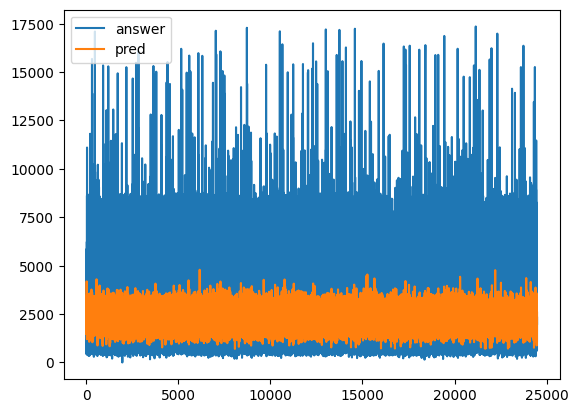

In [ ]:
from sklearn.linear_model import LinearRegression #선형회귀
model = LinearRegression()
model.fit(xt, yt)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
prediction = model.predict(xv)
print("valid mean_absolute_error : ",mean_absolute_error(yv,prediction))
print("valid mean_squared_error : ", mean_squared_error(yv, prediction))
print("valid root_mean_squeared_error : ", (mean_squared_error(yv,prediction))**(1/2))
print("valid r2_score: ", r2_score(yv, prediction))
print((yv).std(),(yv).mean())
plt.plot(list(yv), label = "answer") #실제값
plt.plot(list(prediction), label = "pred") #예측값

plt.legend()
plt.show()

#결론 : 선형회귀로는 패턴이 약하거나 비선형 관계일 가능성이 높음. 다른 모델을 써보면 성능이 올라갈 수 있다


In [ ]:
#확률적경사하강법 기반 선형회귀
#1. 데이터 적재

import pandas as pd
wine_data = pd.read_csv('./wine.csv')
display(wine_data)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [ ]:
#데이터 준비
X = wine_data[["residual sugar", "density"]]
y = wine_data["alcohol"]

In [ ]:
#훈련, 학습 과정

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#데이터 전처리 (preprocessing)중 scaling 과정

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_valid = ss.transform(X_valid)

In [ ]:
#SGDRegressor 모델사용 : 원래 model을 fit 할때마다 기존 학습되었던게 초기화,
#but warm start true fit 할때마다 기존 학습되었던게 이어서 학습할 수 있게 함 (누적학습)

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()

sgd_reg.fit(X_train, y_train)

#예측 얼마나 잘되었는지 평가하기
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
prediction = sgd_reg.predict(X_valid)

print("MAE :", mean_absolute_error(y_valid,prediction))

print("MSE :", mean_squared_error(y_valid, prediction))

print("RMSE :", (mean_squared_error(y_valid,prediction))**(1/2))

print("R2 Score :", r2_score(y_valid,prediction))

MAE : 0.6725160911299751
MSE : 0.7241112714694325
RMSE : 0.8509472789012446
R2 Score : 0.5005362959023688


In [ ]:
#확률적경사하강법 선형회귀를 통한 다항회귀(Polynomial Regression)와 반복학습

#훈련, 학습 과정
from sklearn.model_selection import train_test_split

#다항식(polynomial) 항들을 자동으로 만들어주는 도구를 불러오는 코드(입력값 변형)
#선형회귀는 직선 관계만 학습할 수 있지만, 다항 항을 추가하면 곡선 형태(비선형 관계)도 표현할 수 있음
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# 예시 : 키, 몸무게 > kcal (차수=2)
# 키^2, 몸무게^2, 키*몸무게, 키, 몸무게 (자동으로 다항식을 만들어 줌)

#데이터 rescaling
from sklearn.preprocessing import StandardScaler

#파이프라인, 전처리 스케일러 + polynomialfeatures 한방에 처리해주는 파이프라인 구성
 #((파이프라인을 만들수 있게 클래스 가져오기))
from sklearn.pipeline import Pipeline

#행렬 연산 라이브러리
import numpy as np #수학 계싼, 배열, 행렬 계산기
import pandas as pd #행, 열 구조로 데이터 다루는 관리자 역할(표 형태) - 파일 불러올때 사용해야함
from sklearn.linear_model import SGDRegressor #변형된 입력값 학습 (stochastic gradient descent)

from sklearn.metrics import mean_squared_error # 평가 MSE

wine_data = pd.read_csv('./wine.csv')

X = wine_data[["residual sugar", "density"]]
y = wine_data["alcohol"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=1)

In [ ]:
#((전처리 파이프라인 연결하기))

poly_scaler = Pipeline([ #파이프라인
      ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),#피처들을 제곱변환 하겠다
      ("std_scaler", StandardScaler()) #데이터 스케일링, standardscaler
])
#degree = 2, 몇 차항까지 만들까(현재 2차항),
#include_bias =False (1을 포함할까, 말까) True 1포함(1, x, x2 -> [1,2,4]) False 1미포함(x, x2 -> [2, 4])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)


In [ ]:
#SGD모델 정의
sgd_reg = SGDRegressor(warm_start=True, penalty='l1', random_state=42)
#warm_start : 이전 학습 결과를 이어서 더 학습할거라는 거, fit을 호출할 때마다 새로 초기화되는데,
#이전 학습했던 가중치를 유지하고, 새로운 데이터로 이어서 학습할 수 있음

#penalty : 모델이 너무 복잡해지지 않게 벌점을 주는 방식 (규제, regularization)
#너무 많은 가중치가 커지면 모델이 외워버림(과적합), 이러한 것을 규제
#'l1' = lasso, 'l2' = ridge, 'elasticnet' = l1 + l2 섞음(두 규제의 중간형태)

#random_state : 실함할 때마다 결과가 달라지지 않게 고정
#sgd는 데이터를 랜덤하게 섞어서 학습함.
#그래서 실행할 때마다 조금씩 다른 결과가 나올 수 있는데, 이걸 random state를 지정하며 같은 순서로 섞이게 해서 재현가능한 결과를 얻을 수 있음

#infinite 값 > 어떤 loss 값이 처음에 뜰것인데, 극대값을 초기
miniumum_val_error = float("inf")
best_epoch = None
count = 0

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) #이어서 학습
    y_val_predict = sgd_reg.predict(X_val_poly_scaled) #학습을 하자마자 predict
    val_error = mean_squared_error(y_val, y_val_predict) #valid 평가
    if val_error < minimum_val_error : #맨처음loss < 극대값 => 무조건 갱신
      count = 0
      minimum_val_error = val_error #역대 최저 loss
      best_epoch = epoch #역대 최저 loss가 발생된 epoch
    else : #만약 minimum error가 연속으로 뜬다면 break를 시킬거다
      count +=1
      if count ==5: #모델이 5 epoch동안 개선이 안되면 break (에폭 멈춤)
        break

print(best_epoch, minimum_val_error)

40 0.7191251400650907


In [ ]:
#규제기반 학습


from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

wine_data = pd.read_csv('./wine.csv')

X = wine_data[["residual sugar", "density"]]
y = wine_data["alcohol"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_valid = ss.transform(X_valid)

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1)
ridge_reg.fit(X_train, y_train)
prediction = ridge_reg.predict(X_valid)

print("MAE :", mean_absolute_error(y_valid,prediction))
print("MSE :", mean_squared_error(y_valid,prediction))
print("RMSE :", (mean_squared_error(y_valid,prediction))**(1/2))
print("R2_Score: ", r2_score(y_valid,prediction))

MAE : 0.6752719535765094
MSE : 0.7223995269536865
RMSE : 0.8499408961531892
R2_Score:  0.5017169904861838


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

wine_data = pd.read_csv('./wine.csv')

X = wine_data.iloc[:,:-1] #[["residual sugar", "density"]]
y = wine_data["alcohol"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_valid = ss.transform(X_valid)

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_train, y_train)
prediction = lasso_reg.predict(X_valid)

print("valid mean_absolute_error: ",mean_absolute_error(y_valid,prediction))
print("valid mean_squared_error: ",mean_squared_error(y_valid,prediction))
print("valid root_mean_squared_error: ",(mean_squared_error(y_valid,prediction))**(1/2))
print("valid r2_score: ", r2_score(y_valid,prediction))

valid mean_absolute_error:  0.8520091463374855
valid mean_squared_error:  1.0247924897946232
valid root_mean_squared_error:  1.0123203493927322
valid r2_score:  0.293138122480029


In [ ]:
#로지스틱 회귀
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

wine_data = pd.read_csv('./wine.csv')

X = wine_data[["residual sugar", "density"]]
y = wine_data["class"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state = 1)

In [ ]:
wine_data['class'].value_counts()

,count
class,
0,4898
1,1599


In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_valid = ss.transform(X_valid)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear', random_state=42)
#solver = 'liblinear' 최적의 개수를 찾을때 수학적 최적화 알고리즘 사용할지 정하는 옵션
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
log_reg.coef_

array([[-4.59919   ,  4.43815059]])

In [ ]:
log_reg.predict([[0,100]])

array([1])

In [ ]:
#분류모델 성능지표 함수 불러오기
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
#혼동행렬(tp/fp/fn/tn 표)만드는 함수 불러오기
from sklearn.metrics import confusion_matrix
prediction = log_reg.predict(X_valid)
print("valid f1_score : ", f1_score(y_valid,prediction, average="macro"))
print("valid accurancy_score : ", accuracy_score(y_valid, prediction))
print("valid precision_score : ", (precision_score(y_valid,prediction))**(1/2))
print("valid recll_score : ", recall_score(y_valid,prediction))
print("roc_auc_score: ", roc_auc_score(y_valid,prediction))

valid f1_score :  0.9208828660688928
valid accurancy_score :  0.9446153846153846
valid precision_score :  0.9415932976313764
valid recll_score :  0.8686868686868687
roc_auc_score:  0.9178927862876018


In [ ]:
confusion_matrix(y_valid,prediction)

array([[970,  33],
       [ 39, 258]])

In [ ]:
#[서포터벡터머신 분류 진행]
#SVM

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#Support vector machine classifier == SVC
#선형으로 된 SVM
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC

iris = datasets.load_iris()

X = iris["data"]

In [ ]:
X

In [ ]:
y = (iris["target"] == 2).astype(np.float64)
#target 값이 2인 행은 true, false -> astype(np.float64) : true, flase를 숫자로 바꿔
#아이리스, 세토사, 버시컬러 3개종류 꽃 클래스
#2클래스냐 아니냐 이진분류 데이터로 바뀌어

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
svm_clf = Pipeline([("scaler", StandardScaler()), #데이터 rescaling
                    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))])
#c=1, 규제 강도(숫자가 작을 수록 규제 강함)
#loss="hinge", 손실함수(svm의 기본 손실함수 사용)
#손실함수 : 모델이 틀렸을 때 얼마나 혼낼지(벌점줄지) - 모델이 예측한 결과가 정답과 얼마나 멀리 떨어져 있는지 숫자로 평가하고, 이걸 줄이는 방향으로 모델이 학습
# SVM 학습 시 오류를 얼마나 크게 볼지를 결정하는 기

# kernel='linear'로하면, 내부적으로 선형 SVM계산을 위한 알고리즘 사용
# linearSVC 이름 그대로 오직 선형 SVM만을 위해 최적화된 모델이라서 이거 쓰는게 더 빠름
#Linear Suuport vector machine classifier : SVC, 한지 loss
svm_clf.fit(X_train, y_train) #스케일러랑 모델을 한방에 학습

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [ ]:
#분류 예측
svm_clf.predict([[5.5, 1.7, 2.5, 1.4]])
#새로운 데이터가 들어오면 파이프라인이기 떄문에 스케일링 하고 모델에 들어가서 predict 값이 나오게 된다

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score

prediction = svm_clf.predict(X_val)
f1_score(y_val,prediction, average="macro")

0.9647473560517039

In [ ]:
#원래버전
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
import warnings
warnings.simplefilter("ignore")

iris = datasets.load_iris()
X = iris["data"]
y = iris["target"] #아까 이진분류 였으나, 지금 세토사, 버시컬러, 버지니카 3분류로 바꿈

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)

svcmodel = LinearSVC(C=1, loss="hinge", random_state = 42)
svcmodel.fit(X_train, y_train)
prediction = svcmodel.predict(X_val)
f1_score(y_val, prediction, average="macro") # 3클래스 분류이기 때문에 macro 옵션을 켜줘야함

0.9658994032395567

In [ ]:
#support vector machine - 비선형(polynormical features)분류

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

#SVC에서 kernel을 linear로 해도 되지만, LinearSVC가 최적화 되어있고 더 빠름
polynomial_svm_clf = Pipeline([("poly_features", PolynomialFeatures(degree=3)),
                               ("scaler", StandardScaler()),
                               ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=2000, random_state=42))])
#max_iter: Gredient Descent 방식을 반복해서 몇번 수행할 것인가






polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf',
                 LinearSVC(C=10, loss='hinge', max_iter=2000,
                           random_state=42))])

In [ ]:
polynomial_svm_clf.predict([[3.5, 6.4, 2.3, 2.4]])

array([0])

In [ ]:
#Support Vector Machine - 비선형(polynormial features)분류(simple)
#LinearSVC : 빠름, 그런데 기능들을 추가해줘야함. Predict proba가 없어서 auc 스코어를 구하기 어려움
#SVC : 느림, 지원해주는 옵션이 많음, predict probability 옵션이 있음. 이걸로 auc 스코어 구할 수 있음

from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel = "poly", degree=3, C=5))])

#
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, kernel='poly'))])

In [ ]:


poly_kernel_svm_clf.predict([[3.5, 6.4, 2.3, 1.5]])

array([0])

In [ ]:
rbf_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [ ]:
#Support vector machine - 회귀 (= SVR)

#SVC와 SVR의 차이는 ? - SCV는 클래스(범주)를 나누는 선을 찾음 SVR는 숫자를 예측하는 선을 찾음
#SVR : 너무 작은 오차는 무시하고 큰오차(허용 범위 벗어난 값)만 벌점을 줌

#랜덤하게 50개의 샘플 생성
np.random.seed(42) # 시드 고정
m = 50 # 50개의 샘플을 만들거다
X = 2 * np.random.rand(m, 1) # np.random.rand: m x 1: 열백터 => 50 x 1
y = (4 + 3 * X + np.random.randn(m, 1)).ravel() # 똑같이 50 x 1의 열벡터를 만들고
                                                # 특정값들을 더하고 곱함 (의미 없음)
                                                # ravel의 경우 1차원으로 쭉 펴서 들어감
print(y) # y 값은 1차원(행벡터), m x 1 차원이든(열벡터) 잘 학습된다.

[ 6.98570729  9.87565412  8.27631537  7.29084721  3.45758985  4.21612291
  3.8878629  10.2541791   7.95030836  6.48539531  4.44759094  9.43437683
  8.31773384  5.88571095  6.12194933  6.03170718  4.98623593  6.83932621
  6.92293354  6.72291997  7.19194313  4.65130419  4.64653292  5.00196444
  7.54894573 10.0672958   5.12603257  8.08893953  7.91612344  3.63358272
  8.00666472  6.56118131  4.35448352 11.25795688  7.17404709  9.67228659
  5.91472968  4.28702533  8.19715894  4.65334605  4.51255752  7.32817403
  5.68422517  8.93765219  4.74418629  7.47337666  6.78566857  7.44915924
  6.75050147  5.62239417]


In [ ]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon = 1.5, random_state=42)
#LinearSVR : 오차 +-1.5안에 있으면 괜찮음
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [ ]:
svm_reg.predict(X)

array([5.77545887, 9.22418837, 7.91502286, 7.11693448, 4.46748381,
       4.46733944, 3.88128709, 8.7181795 , 7.13163819, 7.77183992,
       3.65683359, 9.3390846 , 8.51626533, 4.80459379, 4.62194933,
       4.63140378, 5.35468619, 6.67458876, 6.11905978, 5.27679539,
       7.19591051, 4.36857363, 5.28227523, 5.72650725, 6.26346139,
       8.23334743, 4.72878461, 6.61160865, 7.0795611 , 3.81165579,
       7.17012443, 4.55430736, 3.92299441, 9.21324215, 9.31347943,
       8.37234061, 5.35690999, 4.11824674, 7.62914668, 6.16818617,
       4.2640918 , 6.49753853, 3.73945853, 8.97642236, 5.08256876,
       7.49919557, 5.3993914 , 6.64652596, 6.80599499, 4.64008253])

In [ ]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel = "poly", degree=3, epsilon=1.5)
svm_poly_reg.fit(X, y)

SVR(epsilon=1.5, kernel='poly')

In [ ]:
svm_poly_reg.predict(X)

array([ 5.66385695,  9.91765747,  7.4548268 ,  6.5180961 ,  5.40685397,
        5.40684469,  5.3878629 ,  8.81329331,  6.5320794 ,  7.25863551,
        5.38687568, 10.19767707,  8.42834791,  5.43730947,  5.41852449,
        5.4193577 ,  5.53531586,  6.14873461,  5.81175527,  5.51706596,
        6.59455599,  5.40114144,  5.51829806,  5.64610322,  5.88700464,
        7.93911048,  5.42880468,  6.10381613,  6.4830672 ,  5.38735813,
        6.56922447,  5.41297447,  5.38828114,  9.89156159, 10.13430221,
        8.17232292,  5.5358605 ,  5.39174261,  7.07586825,  5.83644073,
        5.39641299,  6.0270193 ,  5.38704411,  9.35123704,  5.47820303,
        6.92013606,  5.54652206,  6.12849492,  6.24841679,  5.42013529])

In [ ]:
import pandas as pd

df = pd.read_csv("train.csv", encoding="cp949")
df

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [ ]:
X = df.iloc[:,3:]
y = df["전력사용량(kWh)"]
print(X)

        기온(°C)  풍속(m/s)  습도(%)  강수량(mm)  일조(hr)  비전기냉방설비운영  태양광보유
0         17.6      2.5   92.0      0.8     0.0        0.0    0.0
1         17.7      2.9   91.0      0.3     0.0        0.0    0.0
2         17.5      3.2   91.0      0.0     0.0        0.0    0.0
3         17.1      3.2   91.0      0.0     0.0        0.0    0.0
4         17.0      3.3   92.0      0.0     0.0        0.0    0.0
...        ...      ...    ...      ...     ...        ...    ...
122395    27.8      2.3   68.0      0.0     0.7        1.0    1.0
122396    27.3      1.2   71.0      0.0     0.0        1.0    1.0
122397    27.3      1.8   71.0      0.0     0.0        1.0    1.0
122398    27.1      1.8   74.0      0.0     0.0        1.0    1.0
122399    27.1      2.6   75.0      0.0     0.0        1.0    1.0

[122400 rows x 7 columns]


In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state = 42)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)

svrmodel = LinearSVR(epsilon=1.5, random_state=42)
svrmodel.fit(X_train,y_train)

LinearSVR(epsilon=1.5, random_state=42)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

prediction = svrmodel.predict(X_val)

print("valid r2_score : ", r2_score(y_val,prediction))
print("valid root_mean_squeared_error : ", (mean_squared_error(y_val, prediction))**(1/2))

valid r2_score :  -0.013953713335203233
valid root_mean_squeared_error :  2079.954685563097


In [ ]:
import pandas as pd
df = pd.read_csv("train.csv", encoding= "utf-8-sig")
df

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


In [ ]:
temp_df = df.loc[df['일자'].str.contains("2020")]

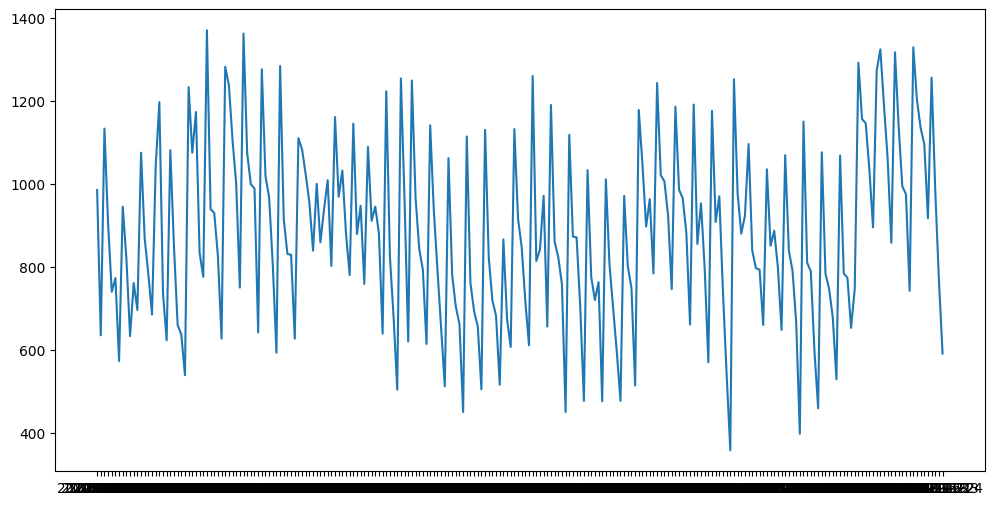

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = [12,6])
plt.plot(temp_df['일자'], temp_df['중식계'])
plt.show()

요일
금    2807.817427
목    2805.815574
수    2805.690377
월    2812.049793
화    2807.712500
Name: 본사정원수, dtype: float64


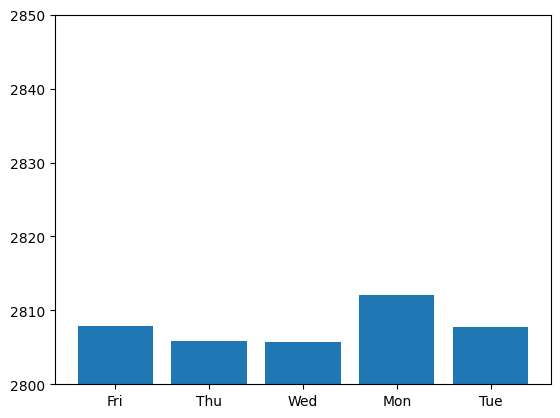

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

print(df.groupby('요일')['본사정원수'].mean())
plt.bar(['Fri', 'Thu', 'Wed', 'Mon', 'Tue'],df.groupby('요일')['본사정원수'].mean())
plt.ylim([2800, 2850])
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
X = df[['요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '중식계']]

le = LabelEncoder()
X['요일'] = le.fit_transform(X['요일'])
X['요일']

,요일
0,3
1,4
2,2
3,1
4,0
...,...
1200,2
1201,1
1202,0
1203,3


In [ ]:
y = df['석식계']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 1)

rs = RobustScaler()

X_train = rs.fit_transform(X_train)
 X_valid = rs.transform(X_valid)

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import Pipeline

kernel_svm_reg = Pipeline([("poly_features", PolynomialFeatures(degree=2)),
                           ("scaler", StandardScaler()),
                           ("svm_reg", LinearSVR(epsilon=0.01, random_state=42))])
kernel_svm_reg.fit(X_train, y_train)

prediction = kernel_svm_reg.predict(X_valid)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("valid MAE: ", mean_absolute_error(y_valid, prediction))
print("valid MSE: ", mean_squared_error(y_valid, prediction))
print("valid RMSE: ", (mean_squared_error(y_valid, prediction))**(1/2))
print("valid R2: ", r2_score(y_valid, prediction))


valid MAE:  71.60130628407862
valid MSE:  11588.496653750017
valid RMSE:  107.64987995232515
valid R2:  0.4266476479850767


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(
        tree_clf,
        feature_names = ["sepal꽃잎 길이(cm)","sepal꽃잎 너비(cm)", "petal꽃입 길이(cm)", "petal꽃잎 너비(cm)"],
        class_names = iris.target_names,
        rounded=True,
        filled=True
)

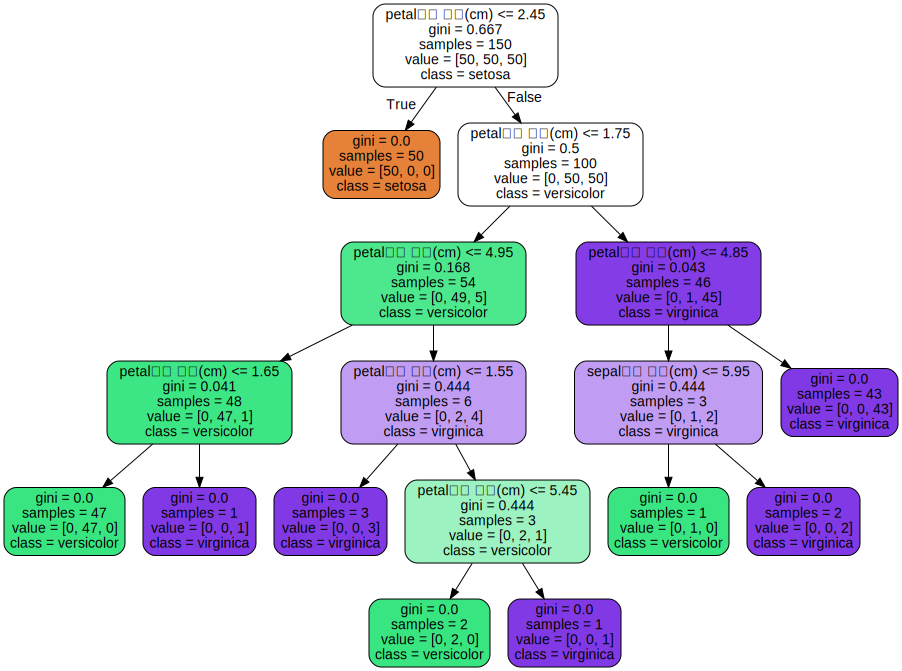

In [ ]:
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(tree_clf, X, y, cv=5, scoring='accuracy')
np.mean(scores), scores

(np.float64(0.9533333333333334),
 array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ]))

In [ ]:
tree_clf.predict([[5, 1.5, 1.2, 0.3]])

array([0])

In [ ]:
tree_clf.feature_importances_

array([0.01333333, 0.        , 0.56405596, 0.42261071])

In [ ]:
import pandas as pd
df = pd.DataFrame({"피처네임":["sepal꽃잎 길이(cm)","sepal꽃잎 너비(cm)","petal 꽃잎 길이(cm)","petal꽃잎 너비(cm)"],
                   "importance":tree_clf.feature_importances_})

df

,피처네임,importance
0,sepal꽃잎 길이(cm),0.013333
1,sepal꽃잎 너비(cm),0.000000
2,petal 꽃잎 길이(cm),0.564056
3,petal꽃잎 너비(cm),0.422611


<BarContainer object of 4 artists>

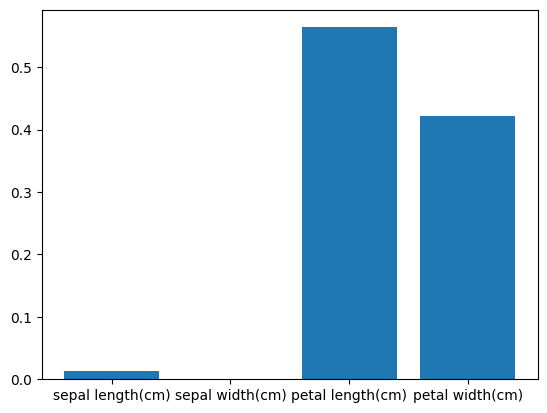

In [ ]:
import matplotlib.pyplot as plt

plt.bar(["sepal length(cm)","sepal width(cm)","petal length(cm)","petal width(cm)"],tree_clf.feature_importances_)

In [ ]:
import numpy as np
# 200개의 난수 데이터셋
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [ ]:
X.shape  # 200 데이터 / 피처 1개

(200, 1)

In [ ]:
y.shape   # 200개 데이터 / 1개 정답값

(200, 1)

In [ ]:
import numpy as np
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
dot_data = tree.export_graphviz(
        tree_reg,
        feature_names=["x1"],
        rounded=True,
        filled=True
)

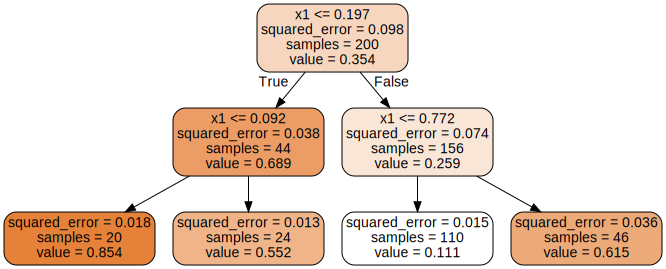

In [ ]:
graph = graphviz.Source(dot_data)
graph

In [ ]:
print(tree_reg.predict([[0.65]]))
print(tree_reg.predict([[0.6]]))

[0.11063973]
[0.11063973]


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X, y, cv=5, scoring='neg_mean_squared_error')
scores
np.mean(-scores)

np.float64(0.02977038858439862)

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import warnings
warnings.simplefilter("ignore")

titanic = pd.read_csv('titanic.csv')

In [ ]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch','Fare']]
y = titanic['Survived']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X["Sex"] = le.fit_transform(X["Sex"])

In [ ]:
X["Age"].fillna(X["Age"].mean(), inplace = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train,X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, shuffle=True)

print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(712, 6)
(179, 6)
(712,)
(179,)


In [ ]:
tree_clf = Pipeline([
    ("std", StandardScaler()),
    ("dc", DecisionTreeClassifier(max_depth=5, random_state=42))])

tree_clf.fit(X, y)



Pipeline(steps=[('std', StandardScaler()),
                ('dc', DecisionTreeClassifier(max_depth=5, random_state=42))])

In [ ]:
tree_clf.fit(X_train, y_train)
prediction =  tree_clf.predict(X_valid)

print("f1_score: ", f1_score(y_valid,prediction))

f1_score:  0.7317073170731707


In [ ]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(
    tree_clf['dc'],
    feature_names = ["Pclass", "Sex", "Age", "SibSp", "Parch","Fare"],
    class_names = ["0", "1"],
    rounded=True,
    filled=True
)


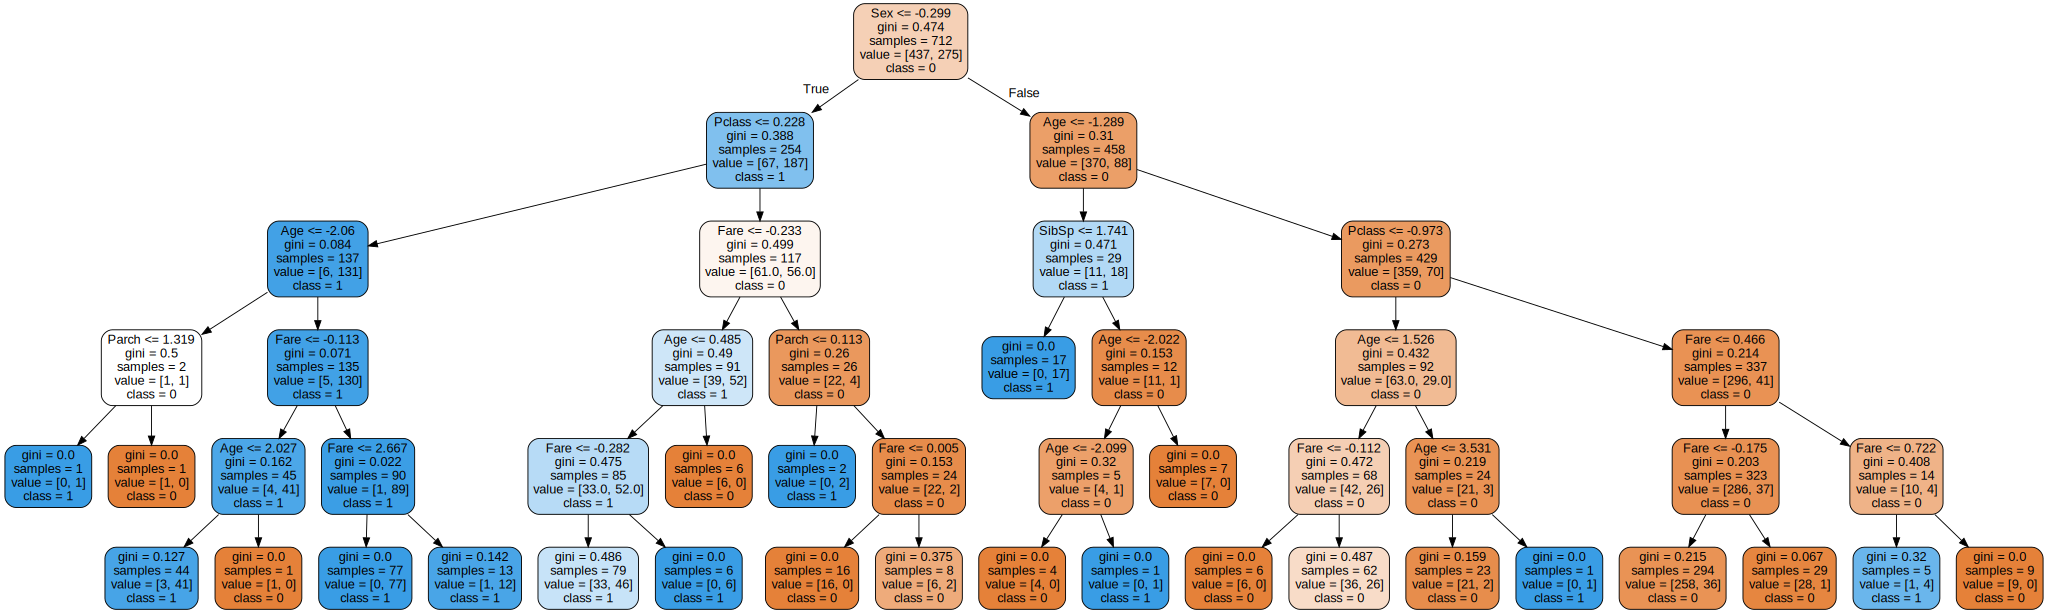

In [ ]:
graph = graphviz.Source(dot_data)
graph

In [ ]:
import pandas as pd
titanic = pd.read_csv('titanic.csv')

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.Sex = titanic.Sex.map({'female':0, 'male':1})

titanic.Age.fillna(titanic.Age.median(), inplace = True)

In [ ]:
titanic.Embarked.fillna('S', inplace=True)

In [ ]:
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked', drop_first=True)
embarked_dummies

,Embarked_Q,Embarked_S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [ ]:
titanic = pd.concat([titanic, embarked_dummies], axis=1)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,S,False,True
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,False,False


In [ ]:
titanic['S_A'] = titanic.Sex + titanic.Age
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S,S_A
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True,23.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,False,False,38.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,False,True,35.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,False,True,36.0


In [ ]:
titanic['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
from imblearn.over_sampling import SMOTE
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
X

,Pclass,Sex,Age,Embarked_Q,Embarked_S
0,3,1,22.0,False,True
1,1,0,38.0,False,False
2,3,0,26.0,False,True
3,1,0,35.0,False,True
4,3,1,35.0,False,True
...,...,...,...,...,...
886,2,1,27.0,False,True
887,1,0,19.0,False,True
888,3,0,28.0,False,True
889,1,1,26.0,False,False


In [ ]:
y = titanic.Survived
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify=y)


In [ ]:
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)

In [ ]:
X.shape

(891, 5)

In [ ]:
y.value_counts()

,count
Survived,
0,549
1,342


In [ ]:
X_resampled.shape

(878, 5)

In [ ]:
y_resampled.value_counts()

,count
Survived,
1,439
0,439


In [ ]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
filltered_X = rs.fit_transform(X_resampled)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=10, random_state=1)
treeclf.fit(filltered_X, y_resampled)

DecisionTreeClassifier(max_depth=10, random_state=1)

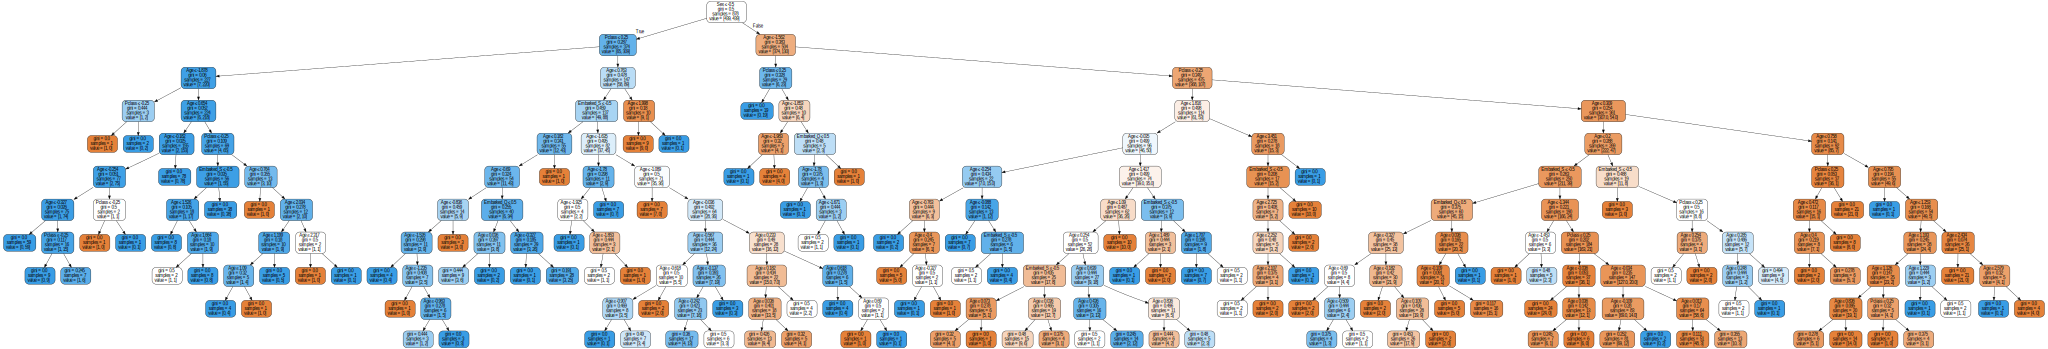

In [ ]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(treeclf, out_file=None,
                                feature_names = feature_cols,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,Pclass,0.160016
1,Sex,0.438966
2,Age,0.361370
3,Embarked_Q,0.009863
4,Embarked_S,0.029785


In [ ]:
from sklearn.metrics import f1_score, accuracy_score
prediction = treeclf.predict(X_valid)

print("f1", f1_score(prediction,y_valid))
print("accuracy", accuracy_score(y_valid, prediction))

f1 0.0
accuracy 0.6145251396648045


In [ ]:
import pandas as pd
df = pd.read_csv("titanic.csv")

<Axes: xlabel='Age'>

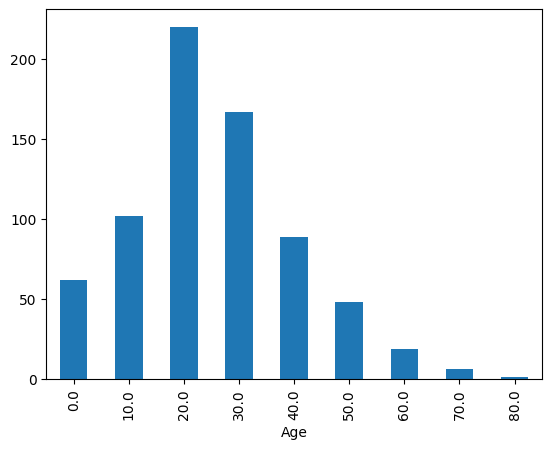

In [ ]:
Age_gen = df['Age'].map(lambda x : x // 10 *10)
Age_gen.value_counts().sort_index().plot(kind = "bar")

In [ ]:
import matplotlib.pyplot as plt
Sex_gen = df['Sex']
group_Sex = Sex_gen.value_counts()

In [ ]:
list(group_Sex)

[577, 314]

In [ ]:
group_Sex.index

Index(['male', 'female'], dtype='object', name='Sex')

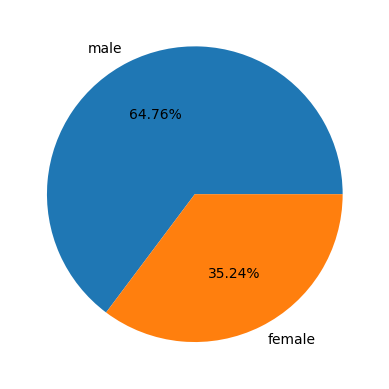

In [ ]:
plt.pie(list(group_Sex), labels = group_Sex.index, autopct = '%.2f%%')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
df = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]

le1 = LabelEncoder()
df['Sex'] = le1.fit_transform(df['Sex'])

le2 = LabelEncoder()
df['Embarked'] = le2.fit_transform(df['Embarked'])

df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [ ]:
df.fillna(df.mean(), inplace = True)

In [ ]:
X = df.iloc[:,1:]
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify = y, random_state=1 )


In [ ]:
from imblearn.over_sampling import SMOTE
st = SMOTE()

X_train_resampled, y_train_resampled = st.fit_resample(X_train, y_train)

In [ ]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_valid = rs.transform(X_valid)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 3)
dtc.fit(X_train_resampled, y_train_resampled)

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

prediction = dtc.predict(X_valid)

print("f1_score",f1_score(prediction, y_valid))
print("accuracy_score",accuracy_score(prediction, y_valid))
print("precision_score",precision_score(prediction, y_valid))
print("recall_score",recall_score(prediction, y_valid))

f1_score 0.5564516129032258
accuracy_score 0.3854748603351955
precision_score 1.0
recall_score 0.3854748603351955


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
y

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size= 0.2, random_state=42)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score, precision_score

rnd_clf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
rnd_clf.fit(X_train, y_train)

predict_result = rnd_clf.predict(X_valid)
print(f1_score(y_valid, predict_result))
print(accuracy_score(y_valid, predict_result))
print(confusion_matrix(y_valid, predict_result))
print(recall_score(y_valid, predict_result))
print(precision_score(y_valid, predict_result))






0.8823529411764706
0.88
[[43  0]
 [12 45]]
0.7894736842105263
1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size= 0.2, random_state=42)

log_clf = LogisticRegression(solver='liblinear', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma='auto', random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc', SVC(gamma='auto', random_state=42))])

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)

    print(clf.__class__.__name__, accuracy_score(y_valid, y_pred))

LogisticRegression 0.85
RandomForestClassifier 0.88
SVC 0.87
VotingClassifier 0.87


In [ ]:
from sklearn.ensemble import BaggingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42)

bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500, n_jobs=-1,
                            random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_valid)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_valid, y_pred))

0.92


In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_valid)
print(accuracy_score(y_valid, y_pred_tree))

0.856


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                             algorithm = "SAMME", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
ada_clf.predict(X_valid)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
import numpy as np

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

X_valid = np.random.rand(100, 1) - 1.5
y_valid = 2*X[:, 0]**4 + 0.05 * np.random.randn(100)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, random_state=42)
gbrt.fit(X, y)

predict = gbrt.predict(X_valid)
print(mean_squared_error(predict, y_valid))

0.11761261867231497


In [ ]:
import joblib
joblib.dump(gbrt, './gbrt.pkl')

['./gbrt.pkl']

In [ ]:
loaded_model = joblib.load('./gbrt.pkl')
predict = loaded_model.predict(X_valid)

print(mean_squared_error(predict, y_valid))

0.11761261867231497


In [ ]:
# 그레디언트 부스팅 분류 모델
from sklearn.ensemble import GradientBoostingClassifier

# Cross validation 하면서 grid search 학습을 하는 방법
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score

# 초승달 데이터
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42)

model = GradientBoostingClassifier(random_state=1)
param_test = { "n_estimators" : [50, 75, 100],
    "max_depth" :[1, 2, 4],
    "learning_rate": [0.0001, 0.001, 0.01, 0.1],
  }

Gsearch = GridSearchCV(model, param_grid=param_test, scoring="accuracy", n_jobs=-1, cv=5)

Gsearch.fit(X_train, y_train)

print(Gsearch.best_params_)

import joblib
joblib.dump(Gsearch, './model.pkl')



{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}


['./model.pkl']

In [ ]:
loaded_model = joblib.load('./model.pkl')
prediction = loaded_model.predict(X_valid)

accuracy_score(y_valid, prediction)

0.896

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0

for n_estimators in range(1, 120):
  gbrt.n_estimators = n_estimators
  gbrt.fit(X_train, y_train)
  y_pred = gbrt.predict(X_val)
  val_error = mean_squared_error(y_val, y_pred)

  if val_error < min_val_error :
    min_val_error = val_error
    error_going_up = 0
  else:
    error_going_up += 1
    if error_going_up == 5:
      break

print("n_estimators 몇개일때 :", gbrt.n_estimators)
print("MSE:", min_val_error)

n_estimators 몇개일때 : 53
MSE: 0.004169425200480838


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)
xgb_reg = XGBClassifier(random_state=42)
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_val)

y_pred = xgb_reg.predict(X_val)
val_error = accuracy_score(y_val, y_pred)
print("검증 accuracy", val_error)

검증 accuracy 0.872


In [ ]:
xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)])
y_pred = xgb_reg.predict(X_val)
val_error = accuracy_score(y_val, y_pred)
print("검증 accuracy:", val_error)

[0]	validation_0-logloss:0.53596
[1]	validation_0-logloss:0.44875
[2]	validation_0-logloss:0.39924
[3]	validation_0-logloss:0.36140
[4]	validation_0-logloss:0.33223
[5]	validation_0-logloss:0.30307
[6]	validation_0-logloss:0.28547
[7]	validation_0-logloss:0.27792
[8]	validation_0-logloss:0.26963
[9]	validation_0-logloss:0.27154
[10]	validation_0-logloss:0.26988
[11]	validation_0-logloss:0.26721
[12]	validation_0-logloss:0.26776
[13]	validation_0-logloss:0.27022
[14]	validation_0-logloss:0.27601
[15]	validation_0-logloss:0.28235
[16]	validation_0-logloss:0.28696
[17]	validation_0-logloss:0.28748
[18]	validation_0-logloss:0.28638
[19]	validation_0-logloss:0.29033
[20]	validation_0-logloss:0.28947
[21]	validation_0-logloss:0.29244
[22]	validation_0-logloss:0.29419
[23]	validation_0-logloss:0.29865
[24]	validation_0-logloss:0.30085
[25]	validation_0-logloss:0.30202
[26]	validation_0-logloss:0.30356
[27]	validation_0-logloss:0.30779
[28]	validation_0-logloss:0.30985
[29]	validation_0-loglos

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

xgb_reg = CatBoostClassifier(random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
val_error = accuracy_score(y_val, y_pred)
print("검증 accuracy:", val_error)

Learning rate set to 0.006777
0:	learn: 0.6856185	total: 70.8ms	remaining: 1m 10s
1:	learn: 0.6783370	total: 72.2ms	remaining: 36s
2:	learn: 0.6714314	total: 73.7ms	remaining: 24.5s
3:	learn: 0.6646326	total: 88.7ms	remaining: 22.1s
4:	learn: 0.6577676	total: 93.6ms	remaining: 18.6s
5:	learn: 0.6510171	total: 96.7ms	remaining: 16s
6:	learn: 0.6444937	total: 99.6ms	remaining: 14.1s
7:	learn: 0.6373915	total: 103ms	remaining: 12.7s
8:	learn: 0.6294688	total: 106ms	remaining: 11.7s
9:	learn: 0.6230388	total: 110ms	remaining: 10.9s
10:	learn: 0.6175978	total: 115ms	remaining: 10.3s
11:	learn: 0.6101859	total: 123ms	remaining: 10.2s
12:	learn: 0.6045585	total: 130ms	remaining: 9.88s
13:	learn: 0.5988113	total: 137ms	remaining: 9.62s
14:	learn: 0.5928872	total: 144ms	remaining: 9.43s
15:	learn: 0.5867203	total: 152ms	remaining: 9.32s
16:	learn: 0.5807582	total: 154ms	remaining: 8.89s
17:	learn: 0.5744523	total: 159ms	remaining: 8.67s
18:	learn: 0.5686082	total: 164ms	remaining: 8.49s
19:	lea

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise = 0.3, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

LGB_reg = LGBMClassifier(n_jobs=-1, random_state=42)
LGB_reg.fit(X_train, y_train)
y_pred = LGB_reg.predict(X_val)
val_error = accuracy_score(y_val, y_pred)
print("검증 accuracy:", val_error)

[LightGBM] [Info] Number of positive: 186, number of negative: 189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 375, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496000 -> initscore=-0.016000
[LightGBM] [Info] Start training from score -0.016000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("train2.csv")

df['Credit_Score'] = df['Credit_Score'].map({'Good':0, 'Standard':1, 'Poor':2})

df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,0
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,266,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629163,0
2,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,0
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,268,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,0
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.663572,378,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,2
99996,155626,37932,5,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,40.565631,379,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,2
99997,155627,37932,6,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,380,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,2
99998,155628,37932,7,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,381,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

X_conti = df.select_dtypes(exclude = object).iloc[:,2:-1]
X_cate = df.select_dtypes(include = object)[["Occupation", "Credit_Mix", "Payment_of_Min_Amount"]]
X_cate.head()

,Occupation,Credit_Mix,Payment_of_Min_Amount
0,Scientist,Good,No
1,Scientist,Good,No
2,Scientist,Good,No
3,Scientist,Good,No
4,Scientist,Good,No


In [ ]:
for i in X_cate.columns:
  X_cate[f"{i}"] = LabelEncoder().fit_transform(X_cate[f"{i}"])

  X = pd.concat([X_conti, X_cate], axis = 1)
  X.head()

In [ ]:
y = df["Credit_Score"]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   SSN                       100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  int64  
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  int64  
 13  Outstanding_Debt          100000 non-null  fl

In [ ]:
y.value_counts()

,count
Credit_Score,
1,53174
2,28998
0,17828


In [ ]:
from imblearn.over_sampling import SMOTENC
categorical = [19,20,21]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

smotenc = SMOTENC(categorical_features=categorical, random_state=42)
X_train_smotenc, y_train_smotenc = smotenc.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

cat = CatBoostClassifier()
lgb = LGBMClassifier()
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('cat', cat), ('rf', rnd_clf), ('lgb', lgb)],
    voting='soft')

voting_clf.fit(X_train_smotenc, y_train_smotenc)

Learning rate set to 0.101331
0:	learn: 1.0238802	total: 177ms	remaining: 2m 56s
1:	learn: 0.9661214	total: 315ms	remaining: 2m 37s
2:	learn: 0.9175056	total: 443ms	remaining: 2m 27s
3:	learn: 0.8779673	total: 601ms	remaining: 2m 29s
4:	learn: 0.8457331	total: 755ms	remaining: 2m 30s
5:	learn: 0.8193734	total: 880ms	remaining: 2m 25s
6:	learn: 0.7973950	total: 1.04s	remaining: 2m 26s
7:	learn: 0.7783437	total: 1.14s	remaining: 2m 21s
8:	learn: 0.7615078	total: 1.3s	remaining: 2m 22s
9:	learn: 0.7473301	total: 1.43s	remaining: 2m 21s
10:	learn: 0.7346339	total: 1.59s	remaining: 2m 22s
11:	learn: 0.7241090	total: 1.76s	remaining: 2m 25s
12:	learn: 0.7139288	total: 1.91s	remaining: 2m 24s
13:	learn: 0.7051874	total: 2.05s	remaining: 2m 24s
14:	learn: 0.6976132	total: 2.17s	remaining: 2m 22s
15:	learn: 0.6911608	total: 2.31s	remaining: 2m 22s
16:	learn: 0.6853497	total: 2.46s	remaining: 2m 22s
17:	learn: 0.6803472	total: 2.63s	remaining: 2m 23s
18:	learn: 0.6756927	total: 2.79s	remaining: 

VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x7aaa64fe2b70>),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('lgb', LGBMClassifier())],
                 voting='soft')

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score, precision_score

predict_result = voting_clf.predict(X_test)
print(f1_score(y_test, predict_result, average = "macro"))
print(accuracy_score(y_test, predict_result))
print(recall_score(y_test, predict_result, average="macro"))
print(precision_score(y_test, predict_result, average="macro"))

0.7745877435276647
0.78285
0.8016932047404736
0.7591043311867894


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier


X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

base_models = [
    ('rf_1', RandomForestClassifier(max_depth=10)),
    ('rf_2', CatBoostClassifier(random_state=42))
]

clf = StackingClassifier(estimators=base_models, \
                         final_estimator=GradientBoostingClassifier(max_depth=4, n_estimators=75, random_state=1))

clf.fit(X_train, y_train)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4:	learn: 0.6618846	total: 4.76ms	remaining: 947ms
5:	learn: 0.6557369	total: 5.62ms	remaining: 931ms
6:	learn: 0.6501288	total: 6.48ms	remaining: 919ms
7:	learn: 0.6433830	total: 7.34ms	remaining: 910ms
8:	learn: 0.6372979	total: 8.16ms	remaining: 898ms
9:	learn: 0.6328082	total: 8.99ms	remaining: 890ms
10:	learn: 0.6267819	total: 9.86ms	remaining: 886ms
11:	learn: 0.6208193	total: 10.7ms	remaining: 880ms
12:	learn: 0.6162379	total: 11.5ms	remaining: 875ms
13:	learn: 0.6106278	total: 12.3ms	remaining: 870ms
14:	learn: 0.6066718	total: 12.8ms	remaining: 841ms
15:	learn: 0.6009885	total: 13.6ms	remaining: 838ms
16:	learn: 0.5950520	total: 14.5ms	remaining: 836ms
17:	learn: 0.5901337	total: 15.3ms	remaining: 834ms
18:	learn: 0.5855874	total: 16.2ms	remaining: 839ms
19:	learn: 0.5809210	total: 17.1ms	remaining: 836ms
20:	learn: 0.5765036	total: 18ms	remaining: 839ms
21:	learn: 0.5721432	total: 18.9ms	remaining: 840ms
22:	learn: 0.5679796	total: 19.8ms	r

StackingClassifier(estimators=[('rf_1', RandomForestClassifier(max_depth=10)),
                               ('rf_2',
                                <catboost.core.CatBoostClassifier object at 0x7bafaa8c06b0>)],
                   final_estimator=GradientBoostingClassifier(max_depth=4,
                                                              n_estimators=75,
                                                              random_state=1))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_predictions = clf.predict(X_test)

print("test acc Average : ", accuracy_score(y_test, test_predictions))

print("test Precision Average : ", precision_score(y_test, test_predictions))

print("test Recall Average :", recall_score(y_test, test_predictions))

print("test F1_score Average :", f1_score(y_test, test_predictions))

test acc Average :  0.904
test Precision Average :  0.9193548387096774
test Recall Average : 0.890625
test F1_score Average : 0.9047619047619048


In [ ]:
!pip install bayesian-optimization

In [ ]:
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

def XGB_cv(max_depth, learning_rate, n_estimators):
  model = XGBClassifier(max_depth=int(max_depth),
                        learning_rate = learning_rate,
                        n_estimators = int(n_estimators)
  )

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  f1 = f1_score(y_test, y_pred)

  return f1

In [ ]:
from bayes_opt import BayesianOptimization
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42)

pbounds = { 'max_depth' : (3,7),
           'learning_rate' : (0.001, 0.2),
            'n_estimators' : (5000, 10000)
            }
bo = BayesianOptimization(f=XGB_cv, pbounds=pbounds, verbose=2, random_state=1)

bo.maximize(init_points=2, n_iter=10)

print(bo.max)

|   iter    |  target   | max_depth | learni... | n_esti... |
-------------------------------------------------------------
| 1         | 0.8360655 | 4.6680880 | 0.1443445 | 5000.5718 |
| 2         | 0.8524590 | 4.2093302 | 0.0302044 | 5461.6929 |
| 3         | 0.8196721 | 3.0       | 0.2       | 5461.2133 |
| 4         | 0.8403361 | 5.8922282 | 0.0428427 | 8853.7396 |
| 5         | 0.8196721 | 3.4620021 | 0.0608805 | 8073.8997 |
| 6         | 0.8360655 | 4.9296680 | 0.0546924 | 9877.9414 |
| 7         | 0.8852459 | 4.8519293 | 0.0044731 | 9877.8068 |
| 8         | 0.8852459 | 3.7993347 | 0.0085697 | 5757.3716 |
| 9         | 0.8292682 | 4.6076669 | 0.1290557 | 9187.0473 |
| 10        | 0.8666666 | 5.1176076 | 0.0216046 | 6469.2343 |
| 11        | 0.8360655 | 3.6424327 | 0.1692341 | 6013.3846 |
| 12        | 0.8852459 | 3.4219685 | 0.0141094 | 6986.6940 |
{'target': np.float64(0.8852459016393442), 'params': {'max_depth': np.float64(4.851929385720929), 'learning_rate': np.float64(0.0044

In [ ]:
model = XGBClassifier(max_depth = int(6.054141795109241),
                      learning_rate=0.06517207912793385,
                      n_estimators=int(9284.808327884073)
                      )

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
f1

0.859504132231405

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 7.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost
import optuna


In [ ]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
def objective(trial) :
  param = {
      'max_depth': trial.suggest_int('max_depth', 1, 10),
      'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
      'n_estimators' : trial.suggest_int('n_estimators', 50, 1000),
      'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
      'gamma': trial.suggest_float('gamma', 0.01, 1.0),
      'subsample': trial.suggest_float('subsample', 0.01, 1.0),
      'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
      'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
      'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
      'random_state': trial.suggest_int('random_state', 1, 1000)
  }

  model = XGBClassifier(**param)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return f1_score(y_test, y_pred)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2025-10-07 00:40:36,153] A new study created in memory with name: no-name-f29b8b73-c8eb-4c09-a1c6-6e3c345c866d
[I 2025-10-07 00:40:36,679] Trial 0 finished with value: 0.8852459016393442 and parameters: {'max_depth': 8, 'learning_rate': 0.36867313332468626, 'n_estimators': 374, 'min_child_weight': 4, 'gamma': 0.9498704354729931, 'subsample': 0.5264066071906808, 'colsample_bytree': 0.3092587071715695, 'reg_alpha': 0.34611597149518575, 'reg_lambda': 0.914747246833524, 'random_state': 459}. Best is trial 0 with value: 0.8852459016393442.
[I 2025-10-07 00:40:37,561] Trial 1 finished with value: 0.773109243697479 and parameters: {'max_depth': 6, 'learning_rate': 0.7037236698124613, 'n_estimators': 523, 'min_child_weight': 10, 'gamma': 0.8628022738656176, 'subsample': 0.26486687967742095, 'colsample_bytree': 0.546678768141333, 'reg_alpha': 0.10849144545975384, 'reg_lambda': 0.3723395579797817, 'random_state': 794}. Best is trial 0 with value: 0.8852459016393442.
[I 2025-10-07 00:40:37,603

In [ ]:
print('Best parameters', study.best_params)

Best parameters {'max_depth': 7, 'learning_rate': 0.09797818823648789, 'n_estimators': 555, 'min_child_weight': 4, 'gamma': 0.21370205859943026, 'subsample': 0.9998653870240021, 'colsample_bytree': 0.44937443980325975, 'reg_alpha': 0.9879407140367508, 'reg_lambda': 0.37734409688710885, 'random_state': 127}


In [ ]:
model = XGBClassifier(**study.best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('f1_score:', f1_score(y_test, y_pred))

f1_score: 0.9105691056910569


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/1

In [ ]:
from pycaret.datasets import get_data
data = get_data('juice')
print(data)

In [ ]:
from pycaret.classification import *
setup_clf = setup(data=data, target='Purchase')
class_top = compare_models()
class_top

In [ ]:
from pycaret.regression import *
from pycaret.datasets import get_data
dataset = get_data('diamond')
exp = setup(dataset, target = 'Price')
reg_top = compare_models()
reg_top

In [ ]:
from pandas import read_csv
from pycaret.classification import setup
from pycaret.classification import compare_models


df = read_csv("titanic.csv")
grid = setup(data=df, target=df.columns[1], verbose=True)

best = compare_models()

print(best)

In [ ]:
import pandas as pd
from autogluon.tabular import TabularDataset TabularPredictor

In [ ]:
train_df = pd.read_csv('./train2.csv').iloc[:50,:]
test_df = pd.read_csv('./test.csv').iloc[:50,:]


In [ ]:
train_df.shape

In [ ]:
train = TabularDatadet(train_df.drop(['ID'], axis = 1))
test = TabularDataset(test_df.drop(['ID'], axis = 1))

In [ ]:
predictor = TabularPredictor(label='Credit_Score', eval_metric='f1_macro').fit(train)

In [ ]:
Id_board = predictor.leaderbard(train, silent=True)
Id_board

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
pred_y = predictor.predict(train)
pred_y

In [ ]:
accuracy_score(pred_y, train['Credit_Score'])

In [ ]:
# [Project 1] 제주 특산물 가격 예측
# 1. EDA
# 1-1. Data 살펴보기
# train 데이터 : 2019.01.01 ~ 2023.03.03
# test 데이터 : 2023.03.04 ~ 2023.03.31
# 주요컬럼 : ID, timestamp, item, corporation, location, supply(kg), price
# 1-2. Price columns 분석
# 명확한 주기성이 나타내는 데이터, 0인값 존재, 트렌드 변화 시점 존재, 일요일 대부분 가격 0
# 1-3. Supply columns 분석
# 0인값 존재, 일요일 대부분 거래량 0, pice 컬럼과 크게 연관됨, 수요가 0이면 가격도 0
# 분류 모두 수요와 가격은 관련이 있음
# TG(-0.195, 음의 상관관계), BC(0.469 양의 상관관계), RD(0.201 약한 양의 상관관계),CR(0.494 강한 양의 상관관계), CB(0.372 중간 정도의 양의 상관관계)


# 2. Data Pre-processing
# 2-1. timestamp column 분해
# 시계열 데이터 전처리를 위한 timestamp 분해(날짜.시간 정보를 여러개 시간 단위로 쪼개서 새로운 열 만들기)
# year, month, day, weekday, day_of_year, week_of_year
# 2-2. supply_week_of_year_mean column 추가
# train data 기준 supply column을 활용하면 예측 정확도가 매우 향상되는 것을 확인
# validation score(MSE) 400점대, supply data활용이 필수적이지만 test data에 존재 x
# 결론: 과거 데이터를 활용해 supply_week_of_year_mean 컬럼 생성
# 2019~2022년 모든 연도 week of year별 평균 = supply_week_of_year_mean column 생성

# 3. Modeling
# 시계열 예측 성능이 좋은 DT기반 모델 실험 (RF, XGBoost, LGBM, CatBoost)
# CatBoost가 압도적 성능을 보임 (데이터가 커다란 category로 구성)
# validation 전략 : K-Fold 사용
# 결론 : catboost회귀모델 이용해서, k-fold교차검증으로 모델을 여러번 학습하고, RMSE로 계산한 뒤 평균냄

# 4. After processing
# EDA에서 알아낸 일요일 대부분 수요와 가격이 0이라 일요일가격 모두 0으로 변환
#Automl 사용안하고 CatBoost 단일 모델만 사용



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import lightgbm as lgb #머신러닝 모델 학습용
import bisect #정렬될 리스트에 값을 끼워 넣을 위치를 빠르게 찾는 것★
from tqdm import tqdm #for 문 사용할때, 진행률(progress bar)를 예쁘게 보여주는 도구★
from sklearn.metrics import mean_squared_error, confusion_matrix #confusion_matrix : 분류 결과를 표로 정리(TP/FP/FN/TN)
from sklearn.preprocessing import LabelEncoder #문자열 카테고리 숫자로 바꿔주기
from sklearn.model_selection import KFold #K조각 나눠 교차검증
import os #운영체제 기능 사용(폴더만들기, 경로 합치기, 파일 유무 확인..)★
import random

import warnings

#FutureWarning 무시
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [ ]:
#Fixed random_seed

def seed_everything(seed): #seed_everything 함수 정의(입력값으로 seed 숫자 받음)
  random.seed(seed) #파이썬 내장 랜덤(random 모듈)의 시드를 고정
  os.environ['PYTHONHASHEED'] = str(seed) #파이썬 내부 해시값(문자정렬, 딕셔너리 순서등)에 영향을 주는 랜덤값 고정
  np.random.seed(seed)

seed_everything(42) #seed 고정

In [ ]:
# Load Data
TRAIN = pd.read_csv('train.csv')
TEST = pd.read_csv('test.csv')

In [ ]:
#원본데이터 보고를 위한 copy 작업
train_df = TRAIN.copy()
test_df = TEST.copy()

In [ ]:
#Data pre-processing
train_df.timestamp = pd.to_datetime(train_df['timestamp'],format='%Y-%m-%d')
test_df.timestamp = pd.to_datetime(test_df['timestamp'], format='%Y-%m-%d')

In [ ]:
for df in [train_df, test_df]:
  df['year'] = df['timestamp'].dt.year
  df['month'] = df['timestamp'].dt.month
  df['day'] = df['timestamp'].dt.day
  df['weekday'] = df['timestamp'].dt.weekday
  df['day_of_year'] = df['timestamp'].dt.day_of_year
  df['week_of_year'] = df['timestamp'].dt.isocalendar().week

In [ ]:
supply_mean = train_df.groupby(['item', 'corporation','week_of_year'])['supply(kg)'].mean().reset_index()

In [ ]:
train_df = pd.merge(train_df,supply_mean, left_on=['item','corporation','week_of_year'],right_on=['item','corporation','week_of_year'],how='left').dropna()
test_df = pd.merge(test_df,supply_mean, left_on=['item','corporation','week_of_year'],right_on=['item','corporation','week_of_year'],how='left').dropna()

In [ ]:
train_df.rename(columns={'supply(kg)_x':'supply','supply(kg)_y':'supply_week_of_year_mean', 'price(원/kg)':'price'},inplace=True)
test_df.rename(columns={'supply(kg)':'supply_week_of_year_mean'},inplace=True)

In [ ]:
train_df

,ID,timestamp,item,corporation,location,supply,price,year,month,day,weekday,day_of_year,week_of_year,supply_week_of_year_mean
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1,1,1,1,52808.920588
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2,2,2,1,52808.920588
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3,3,3,1,52808.920588
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4,4,4,1,52808.920588
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5,5,5,1,52808.920588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27,0,58,9,376770.303030
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28,1,59,9,376770.303030
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1,2,60,9,376770.303030
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2,3,61,9,376770.303030


In [ ]:
#학습용 사용하지 않을 컬럼 제거
train_x = train_df.drop(columns=['ID','timestamp','supply','price'])
train_y = train_df['price']

#테스트용 사용하지 않을 컬럼 제거
test_x = test_df.drop(columns=['ID', 'timestamp'])

In [ ]:
#질적 변수 수치화 (문자형데이터 숫자 바꾸기)
qual_col = ['item','corporation','location']

for i in qual_col:
  le = LabelEncoder()
  train_x[i]=le.fit_transform(train_x[i])
  test_x[i]=le.transform(test_x[i]) #데이터 누수 방지, test에 fit 하면 안됨.

print('Done')

Done


In [ ]:
!pip install catboost

In [ ]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from CatBoost import CatBoostRegressor
from sklearn.neighbors import KneighborsRegressor
from sklearn.ensemble import RandomFroestRegressor

model = CatBoostRegressor(n_estimators = 10000, verbose = 1000, learning_rate=0.02)
#n_estimators : 최대 1만번까지 트리를 쌓을거임
#learning_rate : 학습속도
#verbose :1천번마다 학습 로그 출력

# 5-fold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 각 fold의 모델로부터의 예측을 저장할 리스트와 MAE 점수 리스트
ensemble_predictions = [] #각 fold에서 나온 test 예측을 모아둘 리스트
scores = [] #각 fold의 검증 점수를 모아둘 리스트

for train_idx, val_idx in tqdm(kf.split(train_x), total=5, desc="Processing folds"):
  #train_x를 5등분해서 학습인덱스/검증 인덱스 반복하여 꺼냄
  #진행상태바를 보여주려고 tqdm씀
  X_t, X_val = train_x.iloc[train_idx], train_x.iloc[val_idx]
  y_t, y_val = train_y[train_idx], train_y[val_idx]
#현재 폴드의 학습용/검증용 입출력 데이터로 나눔

#두 모델 모두 학습
model.fit(X_t, y_t, eval_set = (X_val, y_val),early_stopping_rounds=100, use_best_model=True)
#검증 성능 100번 개선 없으면 멈춤, 검증에서 가장 좋았던 모델 보관


#검증 예측& 점수
#각 모델로부터 validation set에 대한 예측을 평균내어 앙상블 예측 생성
val_pred = model.predict(X_val)
#validation set에 대한 대회 평가 산식 계산 후 저장
scores.append(mean_squared_error(y_val, val_pred)**0.5) #RMSE 계산?★
print(mean_squared_error(y_val, val_pred)**0.5)

#test데이터셋에 대한 예측 수행 후 저장
lgbm_pred = model.predict(test_x)
lgbm_pred - np.where(lgbm_pred < 0,0, lgbm_pred) # 음수 예측을 0으로 (타겟이 음수가 나올 수 없는 문제일 때 사용)
ensemble_predictions.append(lgbm_pred)

#폴드가 끝난 뒤 앙상블 평균 구하기
final_predictions = np.mean(ensemble_predictions, axis=0)

#각 fold에서의 validation metric score 와 전체 평균 validation metric score 출력
print("Validation : MAE scores for each fold:", scores)
print("Validation : MAE", np.mean(scores))




ModuleNotFoundError: No module named 'CatBoost'

In [ ]:
#특성 중요도 가져오고, 내림차순 정렬
importances = model.feature_imporances_
indices = np.argsort(importances)[::-1]

In [ ]:
#플롯의 제목과 라벨 설정
plt.figure(figsize=(20,6))
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(train_x.shape[1]),np.array(train_x.columns)[indices], rotation=45)
plt.xlim([-1,train_x.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Features')

#그래프 표시
plt.tight_layout()
plt.show()


SyntaxError: incomplete input (ipython-input-2176972981.py, line 4)

In [ ]:
test_df['price'] = final_predictions

In [ ]:
test_df.loc[test_df.weekday == 6, 'price']=0

In [ ]:
submission=pd.read_csv()
submission['answer'] = test_df['price']
submission